In [7]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

数据导入

In [ ]:
train_data = pd.read_pickle('data/train_data6.pkl')
test_data = pd.read_pickle('data/test_data6.pkl')

单因子测试

In [ ]:
#单因子测试，绘制IC图，计算IC均值
from SingleFactorAnalysis import SingleFactorAnalysis
iclib = []
for factors in tqdm(train_data.columns[2:-1]):
    SFA = SingleFactorAnalysis(data=train_data,factor_col=factors)
    #SFA.calcIC()
    SFA.plotIC()
    iclib.append({
        'factor':factors,
        'RankICMean':SFA.icmean
    })

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [02:18<00:00,  7.30s/it]


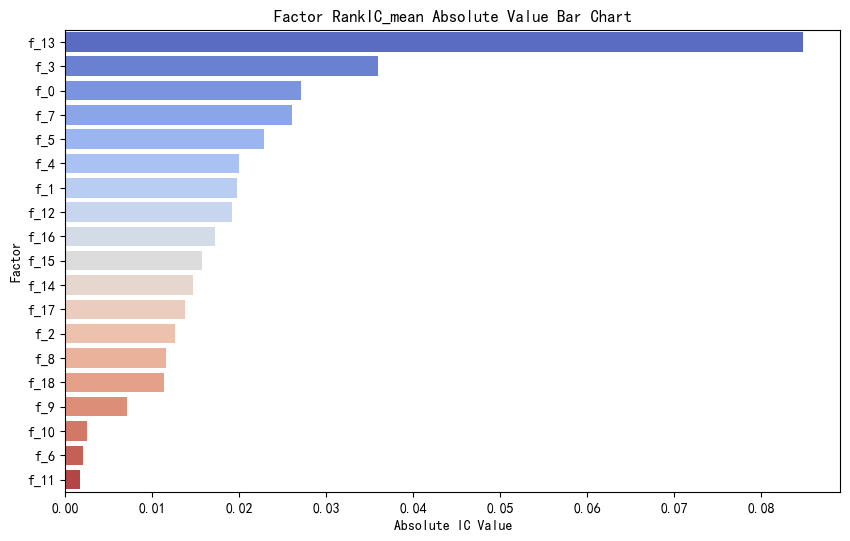

In [20]:
#绘制各个因子的IC均值
ic_df = pd.DataFrame(iclib)
ic_df["IC_abs"] = ic_df["RankICMean"].abs()
ic_df = ic_df.sort_values(by="IC_abs", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="IC_abs", y="factor", data=ic_df, palette="coolwarm")
plt.xlabel("Absolute IC Value")
plt.ylabel("Factor")
plt.title("Factor RankIC_mean Absolute Value Bar Chart")
plt.show()

In [28]:
#去除IC均值（绝对值）在0.01以下的因子
omit_factors = list(ic_df[ic_df['IC_abs']<=0.01].factor)
train_data.drop(omit_factors,axis=1,inplace=True)
test_data.drop(omit_factors,axis=1,inplace=True)

数据预处理

In [ ]:
#数据预处理：去极值、标准化
from DataProcessor import DataProcessor 
params = [
    {"class":'ToNum'},
    {"class":'DropNa'},
    {"class":'CSMidClipOutlier','field_group':'factor','params':5},
    {"class":'CSZScoreNorm',"fields_group":'factor'},
    {'class':'CSRankNorm','data_group':'train_valid_data','field_group':'label'}
]
DP = DataProcessor(train_valid_data=train_data,test_data=test_data,params=params)
possessed_train_data = DP.train_valid_data.dropna()
possessed_train_data.to_pickle('data/possessed_train_data6.pkl')
possessed_test_data = DP.test_data.dropna()
possessed_test_data.to_pickle('data/possessed_test_data6.pkl')